In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 6)

In [47]:
df_sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
df_robberies = pd.read_csv('monthly-boston-armed-robberies-j.csv')
df_passengers = pd.read_csv('international-airline-passengers.csv')
df_temperature = pd.read_csv('mean-monthly-air-temperature-deg.csv')
df_dowjones = pd.read_csv('weekly-closings-of-the-dowjones-.csv')
df_births = pd.read_csv('daily-total-female-births-in-cal.csv')

In [48]:
print("Sales:", df_sales.shape)
print(df_sales.head())
print("Robberies:", df_robberies.shape)
print(df_robberies.head())

Sales: (77, 2)
     Month  Count
0  1965-01    154
1  1965-02     96
2  1965-03     73
3  1965-04     49
4  1965-05     36
Robberies: (118, 2)
     Month  Count
0  1966-01     41
1  1966-02     39
2  1966-03     50
3  1966-04     40
4  1966-05     43


In [49]:
def check_stationarity(series, name=''):
    result = adfuller(series.dropna())
    print(f'Тест для {name}')
    print(f'ADF статистика: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Критические значения:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.3f}')
    
    if result[1] < 0.05:
        print('Ряд стационарный (p < 0.05)')
        return True
    else:
        print('Ряд не стационарный (p >= 0.05)')
        return False

In [50]:
# Company X Sales
df_sales.columns = ['Month', 'Sales']
df_sales['Month'] = pd.to_datetime(df_sales['Month'])
df_sales.set_index('Month', inplace=True)

sales = df_sales['Sales']
print(sales.head())

Month
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
Name: Sales, dtype: int64


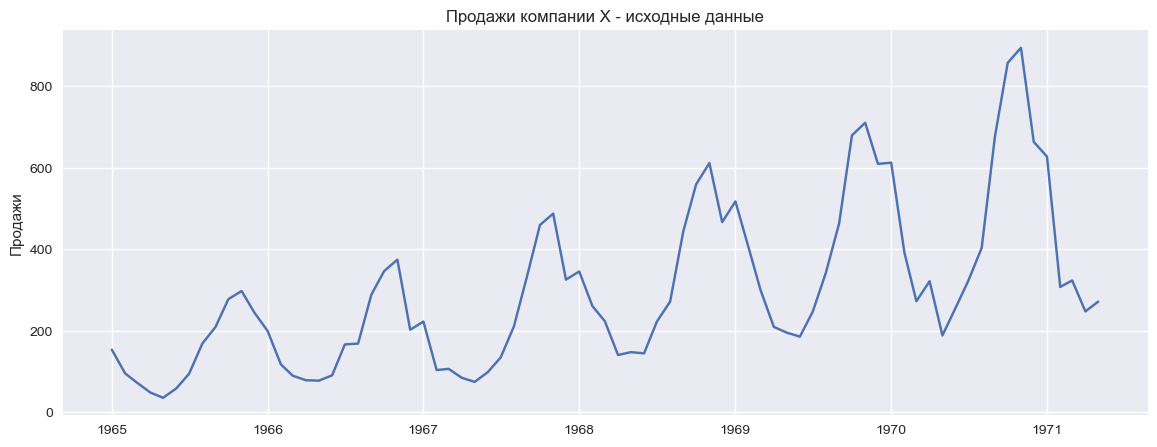

In [51]:
plt.figure(figsize=(14, 5))
plt.plot(sales)
plt.title('Продажи компании X - исходные данные')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

In [52]:
# проверяем стационарность
check_stationarity(sales, 'Sales (исходный)')

Тест для Sales (исходный)
ADF статистика: 0.6547
p-value: 0.9889
Критические значения:
  1%: -3.537
  5%: -2.908
  10%: -2.591
Ряд не стационарный (p >= 0.05)


False

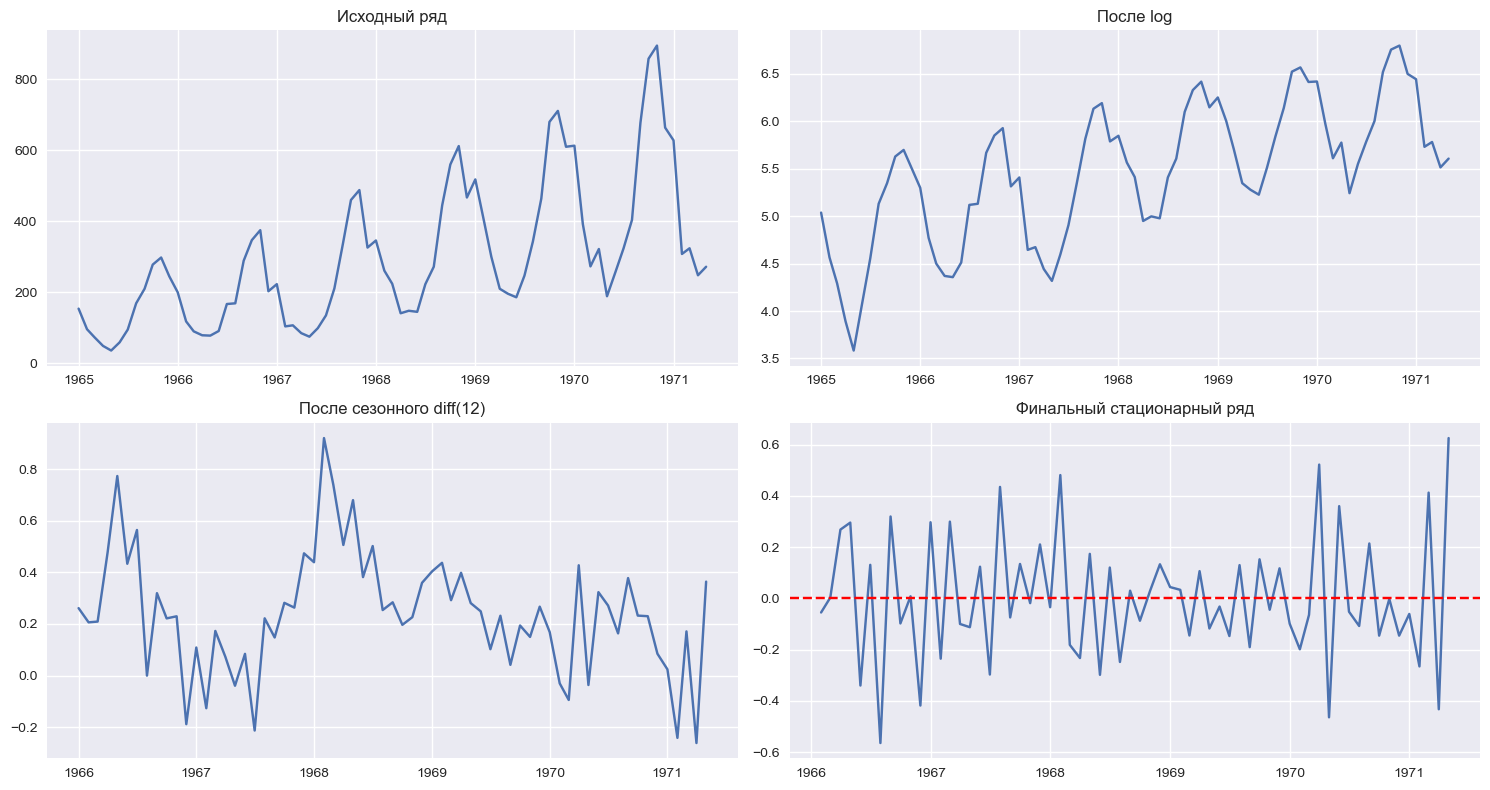

In [53]:
# есть тренд и сезонность
# сначала логарифмируем
sales_log = np.log(sales)

# потом убираем сезонность
sales_diff_seasonal = sales_log.diff(12)

# потом убираем тренд
sales_stationary = sales_diff_seasonal.diff()

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

axes[0, 0].plot(sales)
axes[0, 0].set_title('Исходный ряд')
axes[0, 0].grid(True)

axes[0, 1].plot(sales_log)
axes[0, 1].set_title('После log')
axes[0, 1].grid(True)

axes[1, 0].plot(sales_diff_seasonal)
axes[1, 0].set_title('После сезонного diff(12)')
axes[1, 0].grid(True)

axes[1, 1].plot(sales_stationary)
axes[1, 1].set_title('Финальный стационарный ряд')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [54]:
check_stationarity(sales_stationary, 'Sales (стационарный)')

Тест для Sales (стационарный)
ADF статистика: -2.3160
p-value: 0.1668
Критические значения:
  1%: -3.560
  5%: -2.918
  10%: -2.597
Ряд не стационарный (p >= 0.05)


False

In [55]:
# Boston Robberies
df_robberies.columns = ['Month', 'Robberies']
df_robberies['Month'] = pd.to_datetime(df_robberies['Month'])
df_robberies.set_index('Month', inplace=True)

robberies = df_robberies['Robberies']
print(robberies.head())

Month
1966-01-01    41
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
Name: Robberies, dtype: int64


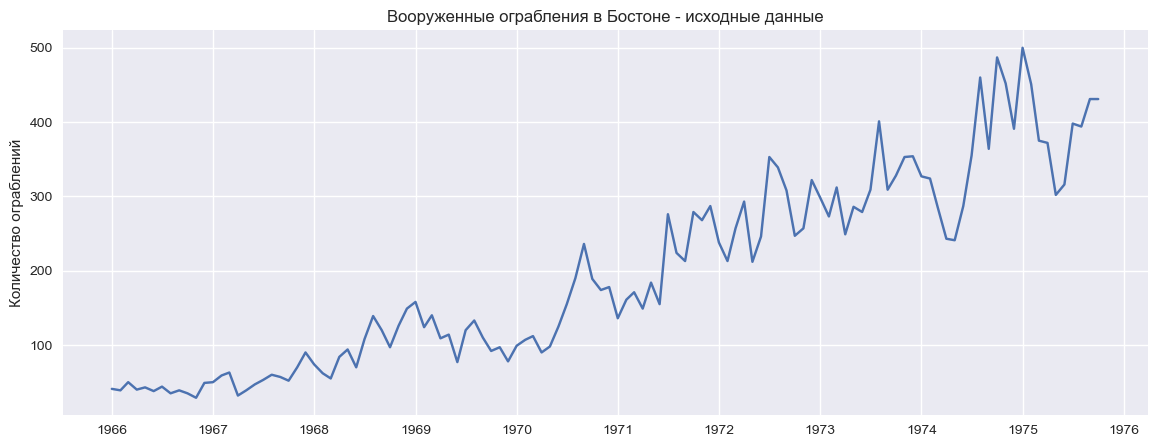

In [56]:
plt.figure(figsize=(14, 5))
plt.plot(robberies)
plt.title('Вооруженные ограбления в Бостоне - исходные данные')
plt.ylabel('Количество ограблений')
plt.grid(True)
plt.show()

In [57]:
check_stationarity(robberies, 'Robberies (исходный)')

Тест для Robberies (исходный)
ADF статистика: 1.0011
p-value: 0.9943
Критические значения:
  1%: -3.494
  5%: -2.889
  10%: -2.582
Ряд не стационарный (p >= 0.05)


False

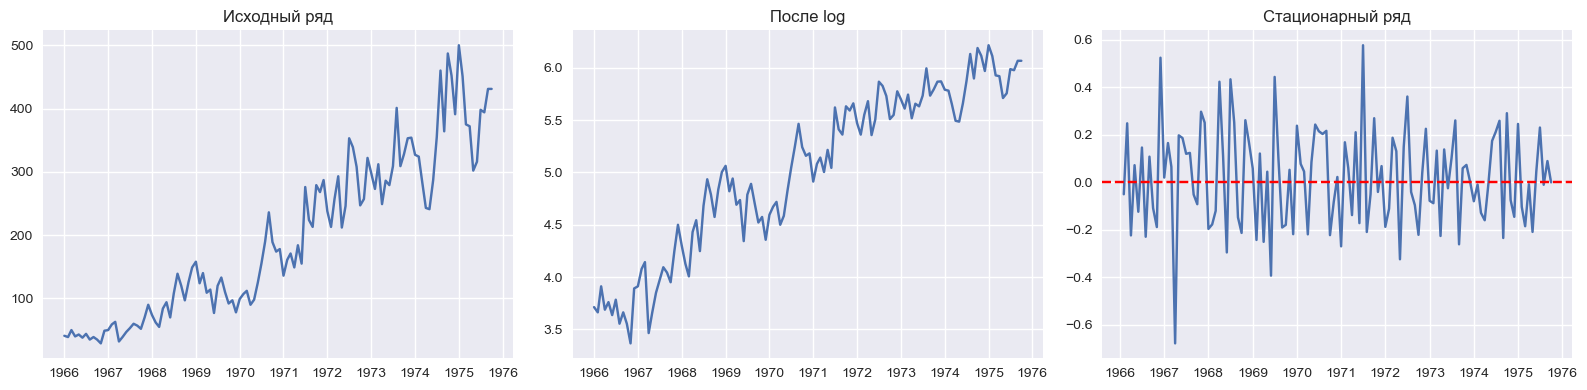

In [58]:
# есть тренд роста
robberies_log = np.log(robberies)
robberies_stationary = robberies_log.diff()

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(robberies)
axes[0].set_title('Исходный ряд')
axes[0].grid(True)

axes[1].plot(robberies_log)
axes[1].set_title('После log')
axes[1].grid(True)

axes[2].plot(robberies_stationary)
axes[2].set_title('Стационарный ряд')
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [59]:
check_stationarity(robberies_stationary, 'Robberies (стационарный)')

Тест для Robberies (стационарный)
ADF статистика: -7.6018
p-value: 0.0000
Критические значения:
  1%: -3.490
  5%: -2.887
  10%: -2.581
Ряд стационарный (p < 0.05)


True

In [60]:
df_passengers.columns = ['Month', 'Passengers']
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'])
df_passengers.set_index('Month', inplace=True)

passengers = df_passengers['Passengers']
print(passengers.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


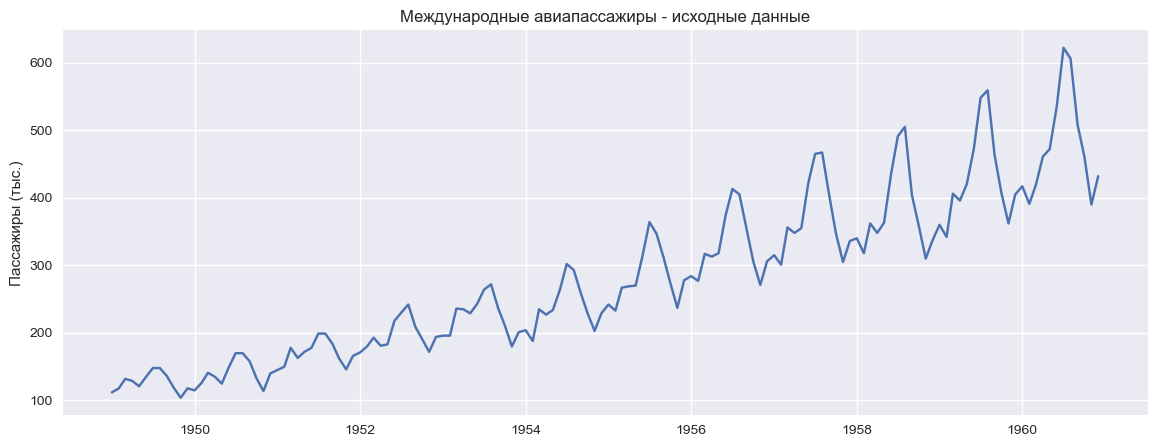

In [61]:
plt.figure(figsize=(14, 5))
plt.plot(passengers)
plt.title('Международные авиапассажиры - исходные данные')
plt.ylabel('Пассажиры (тыс.)')
plt.grid(True)
plt.show()

In [62]:
check_stationarity(passengers, 'Passengers (исходный)')

Тест для Passengers (исходный)
ADF статистика: 0.8154
p-value: 0.9919
Критические значения:
  1%: -3.482
  5%: -2.884
  10%: -2.579
Ряд не стационарный (p >= 0.05)


False

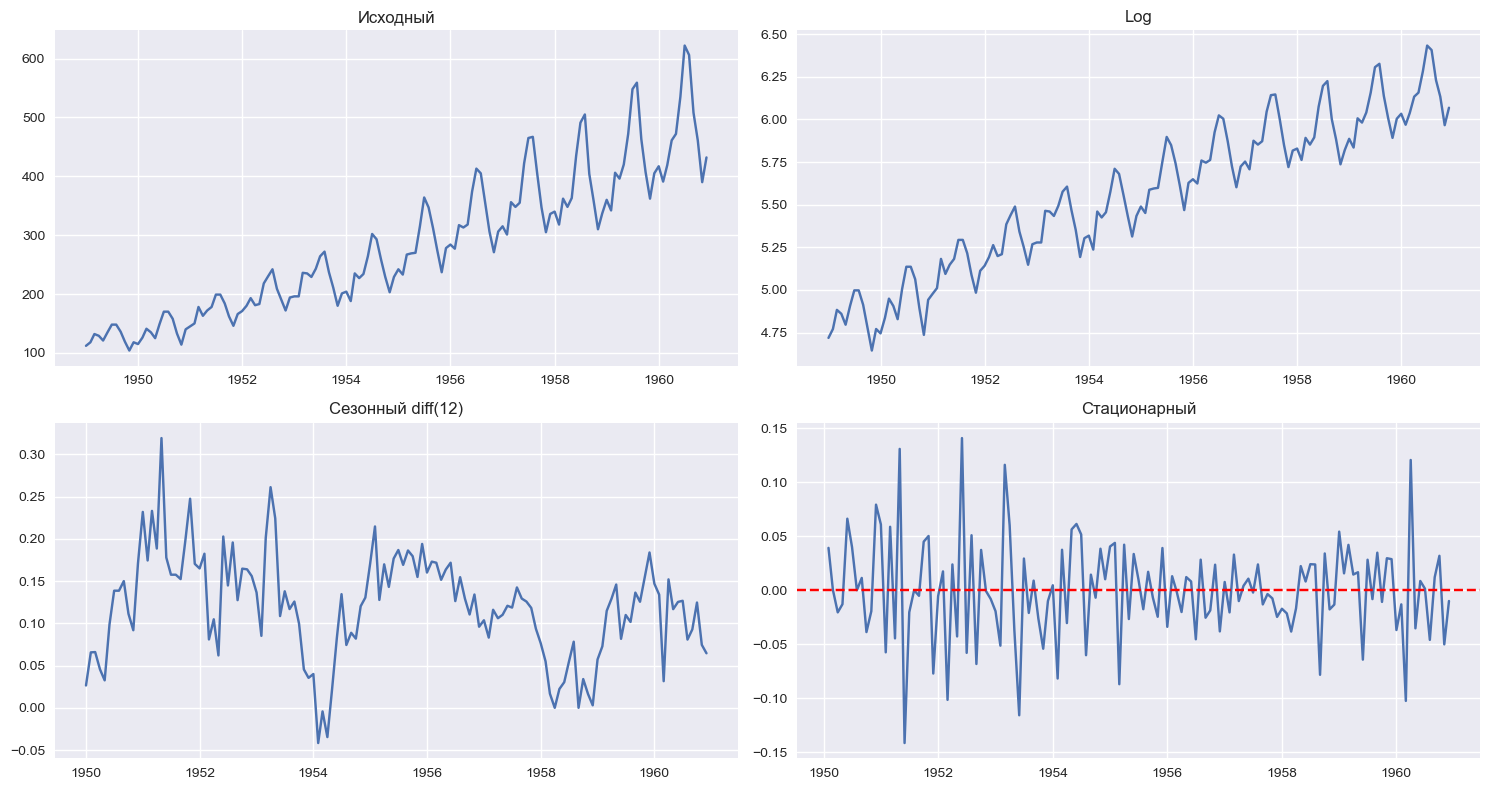

In [63]:
# тренд и сезонность
passengers_log = np.log(passengers)
passengers_seasonal = passengers_log.diff(12)
passengers_stationary = passengers_seasonal.diff()

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

axes[0, 0].plot(passengers)
axes[0, 0].set_title('Исходный')
axes[0, 0].grid(True)

axes[0, 1].plot(passengers_log)
axes[0, 1].set_title('Log')
axes[0, 1].grid(True)

axes[1, 0].plot(passengers_seasonal)
axes[1, 0].set_title('Сезонный diff(12)')
axes[1, 0].grid(True)

axes[1, 1].plot(passengers_stationary)
axes[1, 1].set_title('Стационарный')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [64]:
check_stationarity(passengers_stationary, 'Passengers (стационарный)')

Тест для Passengers (стационарный)
ADF статистика: -4.4433
p-value: 0.0002
Критические значения:
  1%: -3.487
  5%: -2.886
  10%: -2.580
Ряд стационарный (p < 0.05)


True

In [65]:
df_temperature.columns = ['Month', 'Temperature']
df_temperature['Month'] = pd.to_datetime(df_temperature['Month'])
df_temperature.set_index('Month', inplace=True)

temperature = df_temperature['Temperature']
print(temperature.head())

Month
1920-01-01    40.6
1920-02-01    40.8
1920-03-01    44.4
1920-04-01    46.7
1920-05-01    54.1
Name: Temperature, dtype: float64


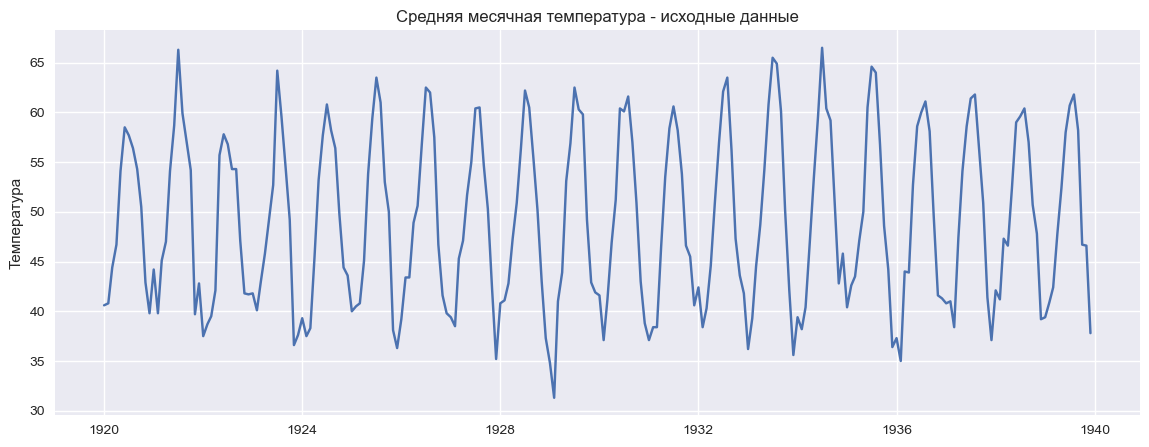

In [66]:
plt.figure(figsize=(14, 5))
plt.plot(temperature)
plt.title('Средняя месячная температура - исходные данные')
plt.ylabel('Температура')
plt.grid(True)
plt.show()

In [67]:
check_stationarity(temperature, 'Temperature (исходный)')

Тест для Temperature (исходный)
ADF статистика: -3.2555
p-value: 0.0170
Критические значения:
  1%: -3.460
  5%: -2.874
  10%: -2.574
Ряд стационарный (p < 0.05)


True

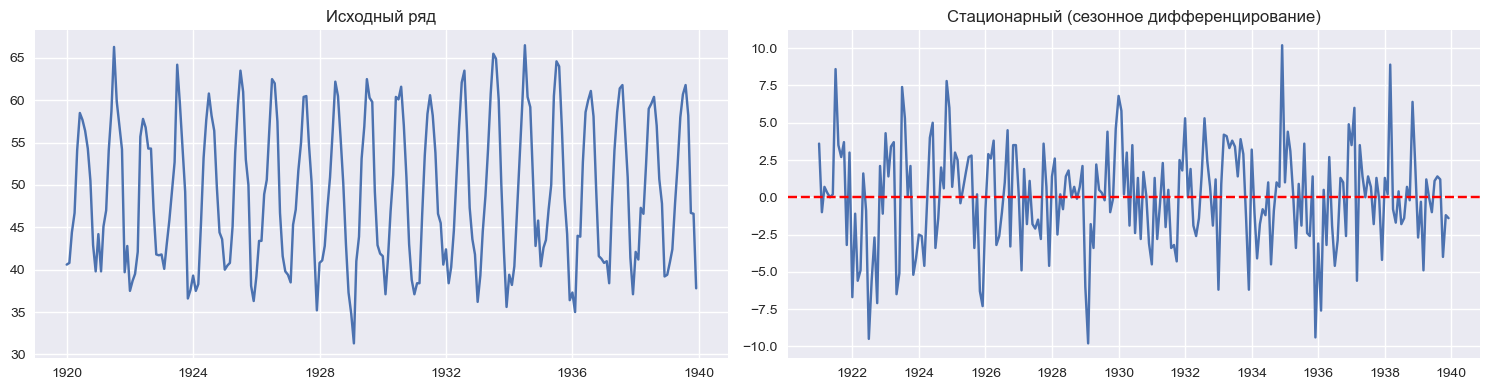

In [68]:
# есть сезонность, но нет тренда
# достаточно сезонного дифференцирования
temperature_stationary = temperature.diff(12)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].plot(temperature)
axes[0].set_title('Исходный ряд')
axes[0].grid(True)

axes[1].plot(temperature_stationary)
axes[1].set_title('Стационарный (сезонное дифференцирование)')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [69]:
check_stationarity(temperature_stationary, 'Temperature (стационарный)')

Тест для Temperature (стационарный)
ADF статистика: -6.0725
p-value: 0.0000
Критические значения:
  1%: -3.461
  5%: -2.875
  10%: -2.574
Ряд стационарный (p < 0.05)


True

In [70]:
# Dow Jones
df_dowjones.columns = ['Week', 'Index']
df_dowjones['Week'] = pd.to_datetime(df_dowjones['Week'] + '-1', format='%Y-W%W-%w')
df_dowjones.set_index('Week', inplace=True)

dowjones = df_dowjones['Index']
print(dowjones.head())

Week
1971-07-05    890.19
1971-07-12    901.80
1971-07-19    888.51
1971-07-26    887.78
1971-08-02    858.43
Name: Index, dtype: float64


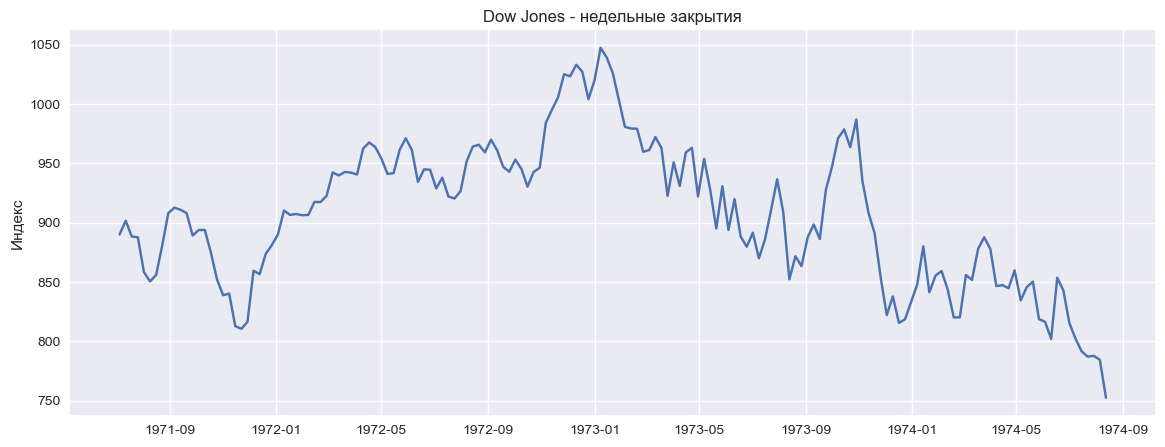

In [71]:
plt.figure(figsize=(14, 5))
plt.plot(dowjones)
plt.title('Dow Jones - недельные закрытия')
plt.ylabel('Индекс')
plt.grid(True)
plt.show()

In [72]:
check_stationarity(dowjones, 'Dow Jones (исходный)')

Тест для Dow Jones (исходный)
ADF статистика: -1.3146
p-value: 0.6225
Критические значения:
  1%: -3.472
  5%: -2.880
  10%: -2.576
Ряд не стационарный (p >= 0.05)


False

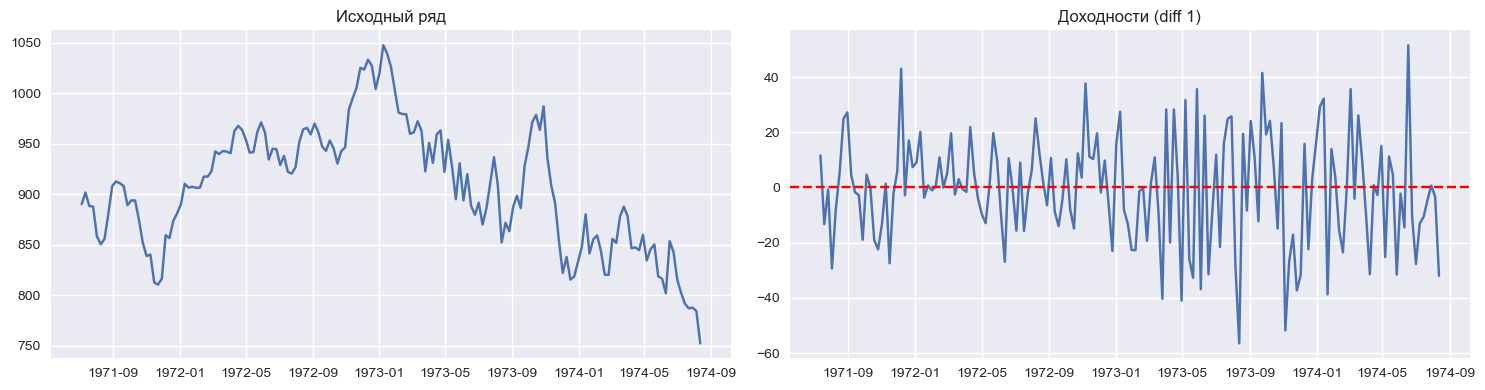

In [73]:
# график хаотичный
# дифференцирование = доходности
dowjones_stationary = dowjones.diff()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].plot(dowjones)
axes[0].set_title('Исходный ряд')
axes[0].grid(True)

axes[1].plot(dowjones_stationary)
axes[1].set_title('Доходности (diff 1)')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [74]:
check_stationarity(dowjones_stationary, 'Dow Jones (стационарный)')

Тест для Dow Jones (стационарный)
ADF статистика: -13.0252
p-value: 0.0000
Критические значения:
  1%: -3.472
  5%: -2.880
  10%: -2.576
Ряд стационарный (p < 0.05)


True

In [75]:
# Female Births
df_births.columns = ['Date', 'Births']
df_births['Date'] = pd.to_datetime(df_births['Date'])
df_births.set_index('Date', inplace=True)

births = df_births['Births']
print(births.head())

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


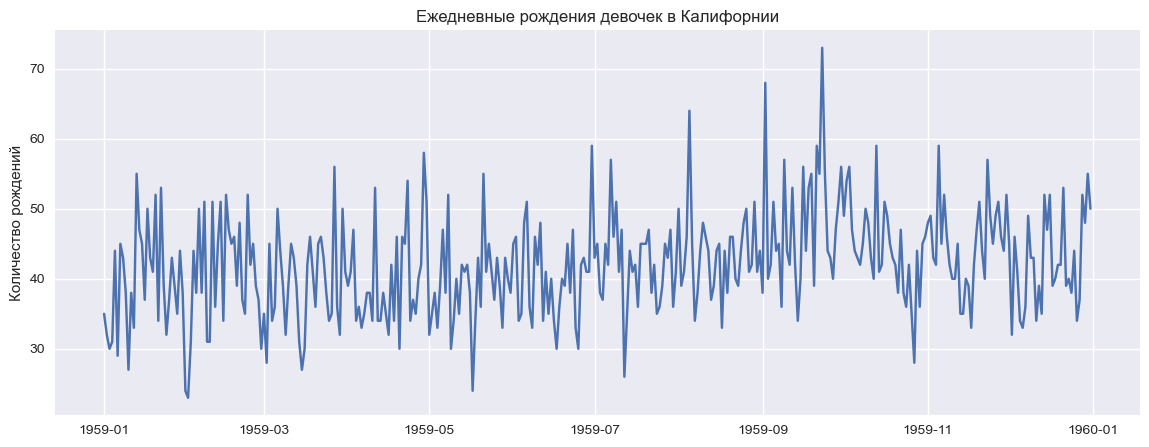

In [76]:
plt.figure(figsize=(14, 5))
plt.plot(births)
plt.title('Ежедневные рождения девочек в Калифорнии')
plt.ylabel('Количество рождений')
plt.grid(True)
plt.show()

In [77]:
check_stationarity(births, 'Births (исходный)')

Тест для Births (исходный)
ADF статистика: -4.8083
p-value: 0.0001
Критические значения:
  1%: -3.449
  5%: -2.870
  10%: -2.571
Ряд стационарный (p < 0.05)


True

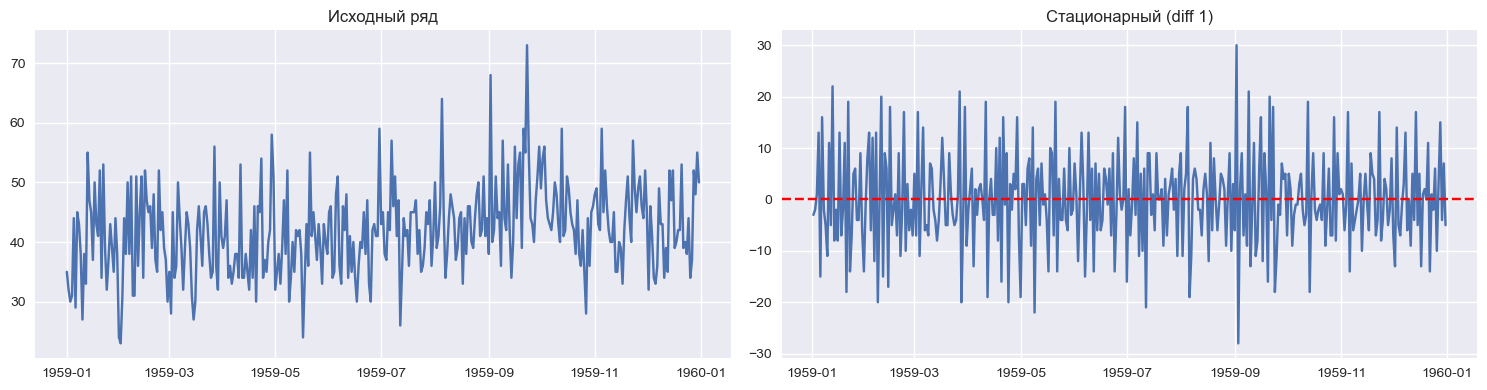

In [78]:
# виден совсем небольшой тренд
births_stationary = births.diff()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].plot(births)
axes[0].set_title('Исходный ряд')
axes[0].grid(True)

axes[1].plot(births_stationary)
axes[1].set_title('Стационарный (diff 1)')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [79]:
check_stationarity(births_stationary, 'Births (стационарный)')

Тест для Births (стационарный)
ADF статистика: -12.6252
p-value: 0.0000
Критические значения:
  1%: -3.449
  5%: -2.870
  10%: -2.571
Ряд стационарный (p < 0.05)


True

In [80]:
results = pd.DataFrame({
    'Временной ряд': [
        'Company X Sales',
        'Boston Robberies', 
        'Airline Passengers',
        'Air Temperature',
        'Dow Jones',
        'Female Births'
    ],
    'Применённое преобразование': [
        'log + seasonal diff(12) + diff(1)',
        'log + diff(1)',
        'log + seasonal diff(12) + diff(1)',
        'seasonal diff(12)',
        'diff(1)',
        'diff(1)'
    ],
    'Стационарен': [
        'Да',
        'Да',
        'Да',
        'Да',
        'Да',
        'Да'
    ]
})

print(results.to_string(index=False))

     Временной ряд        Применённое преобразование Стационарен
   Company X Sales log + seasonal diff(12) + diff(1)          Да
  Boston Robberies                     log + diff(1)          Да
Airline Passengers log + seasonal diff(12) + diff(1)          Да
   Air Temperature                 seasonal diff(12)          Да
         Dow Jones                           diff(1)          Да
     Female Births                           diff(1)          Да


Все преобразованные ряды прошли тест Дики-Фуллера (p-value < 0.05), что подтверждает их стационарность